In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# prob.statement-

find the salary to the employee

# load dataset

In [2]:
df = pd.read_csv('C:\\Users\\pc\\Desktop\\jupyter_notebook\\salary_predict.csv')

In [3]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [4]:
df.shape

(397, 6)

In [5]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [6]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [7]:
df.isnull().sum().sum()

0

In [8]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 14.0+ KB


<AxesSubplot:xlabel='salary', ylabel='count'>

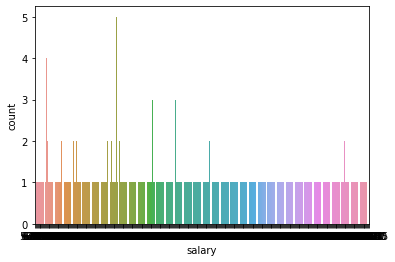

In [10]:
sns.countplot(x = 'salary',data=df)

<AxesSubplot:xlabel='salary', ylabel='yrs.service'>

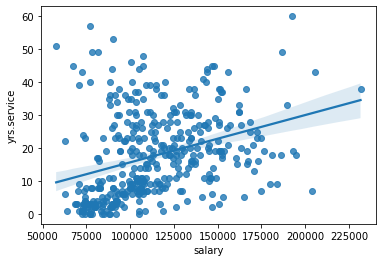

In [11]:
sns.regplot(x = 'salary',y='yrs.service',data=df)

<AxesSubplot:xlabel='rank', ylabel='salary'>

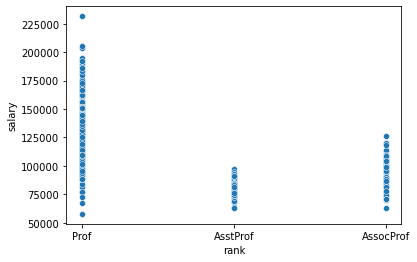

In [12]:
sns.scatterplot(x = 'rank',y='salary',data=df)

prof has higher salary othan than rank

<AxesSubplot:xlabel='sex', ylabel='salary'>

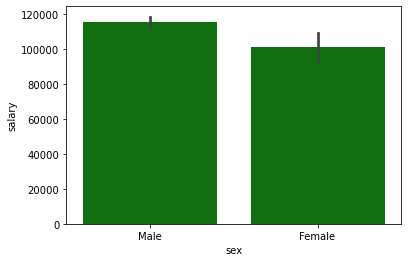

In [13]:
sns.barplot(x='sex',y='salary',data=df,n_boot=1000,color='g',saturation=0.75)

we can see both are diffrent adccept the salary but male has higher salary

In [14]:
df.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


<AxesSubplot:>

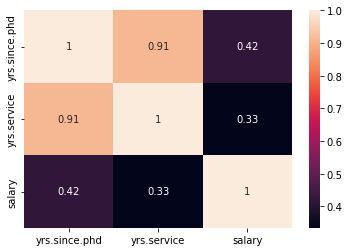

In [15]:
sns.heatmap(df.corr(),annot=True)

yrs.since.phd and yrs.service highly positive correlation

so remove the one features

In [16]:
df.drop(['yrs.since.phd'],axis=1,inplace=True)

In [17]:
df

,rank,discipline,yrs.service,sex,salary
0,Prof,B,18,Male,139750
1,Prof,B,16,Male,173200
2,AsstProf,B,3,Male,79750
3,Prof,B,39,Male,115000
4,Prof,B,41,Male,141500
...,...,...,...,...,...
392,Prof,A,30,Male,103106
393,Prof,A,19,Male,150564
394,Prof,A,25,Male,101738
395,Prof,A,15,Male,95329


In [18]:
df.corr()

,yrs.service,salary
yrs.service,1.000000,0.334745
salary,0.334745,1.000000


<AxesSubplot:>

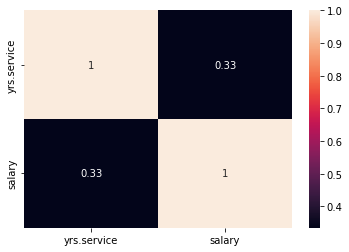

In [19]:
sns.heatmap(df.corr(),annot=True)

in our data acoording my threshold 0.8 so no heavy  positive correlation

In [20]:
df.columns

Index(['rank', 'discipline', 'yrs.service', 'sex', 'salary'], dtype='object')

object data convert numericale data from one hot code

In [21]:
df = pd.get_dummies(df)

In [22]:
df

,yrs.service,salary,rank_AssocProf,rank_AsstProf,rank_Prof,discipline_A,discipline_B,sex_Female,sex_Male
0,18,139750,0,0,1,0,1,0,1
1,16,173200,0,0,1,0,1,0,1
2,3,79750,0,1,0,0,1,0,1
3,39,115000,0,0,1,0,1,0,1
4,41,141500,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...
392,30,103106,0,0,1,1,0,0,1
393,19,150564,0,0,1,1,0,0,1
394,25,101738,0,0,1,1,0,0,1
395,15,95329,0,0,1,1,0,0,1


# check the distribution

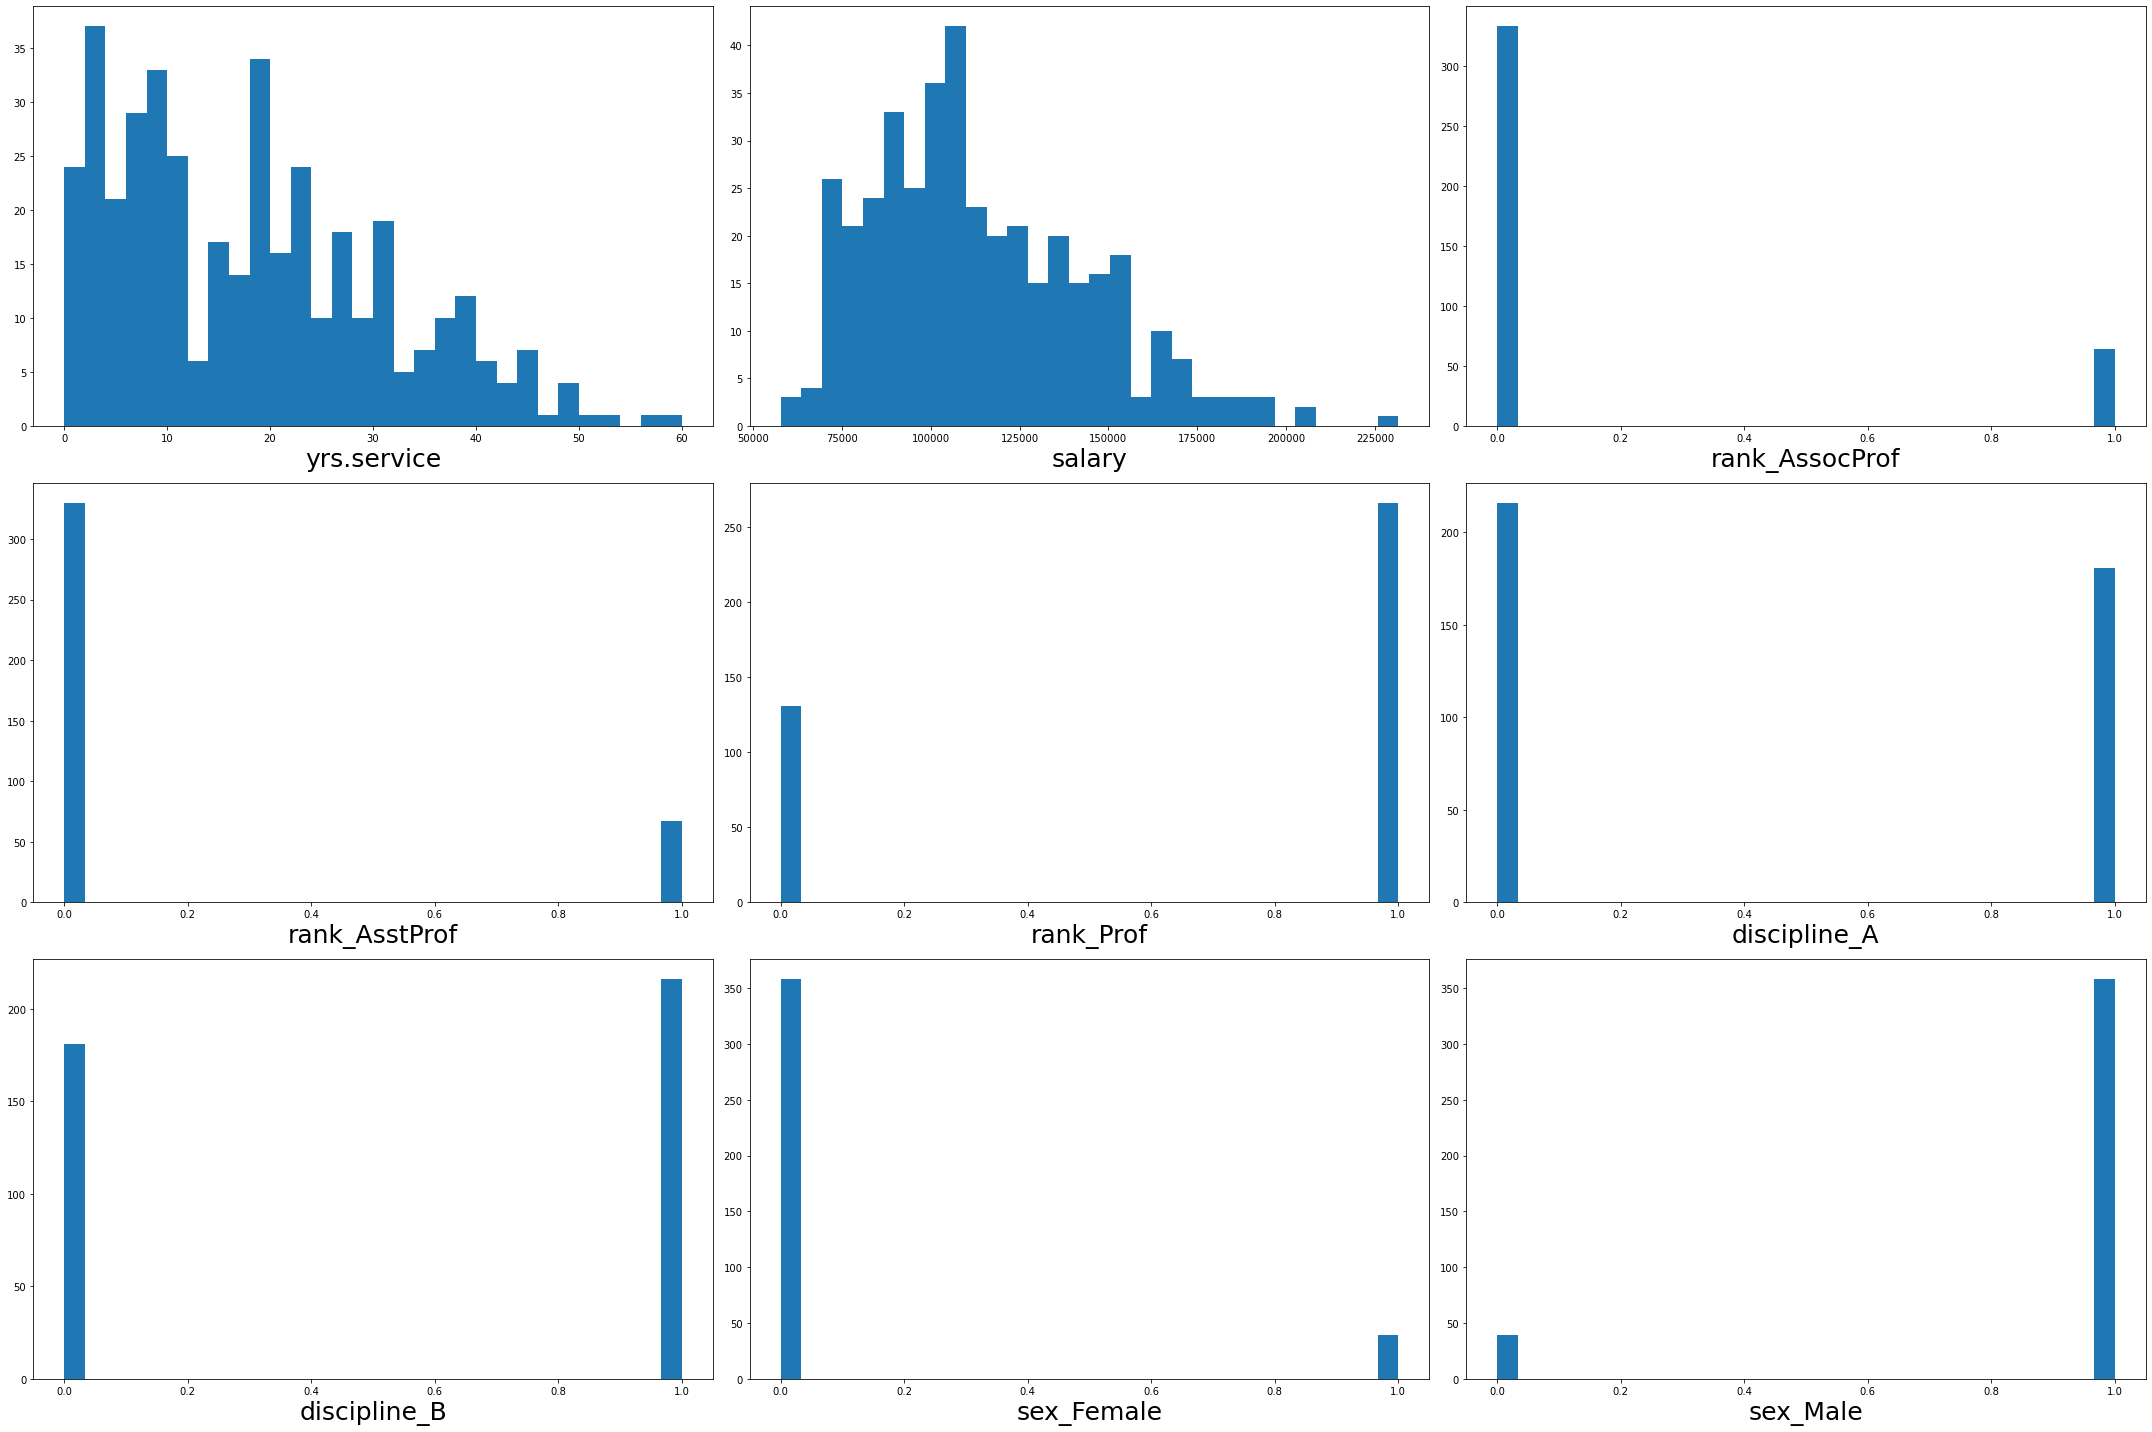

In [23]:
plt.figure(figsize=(30,20))
plotnumber=1

for column in df:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        plt.hist(df[column],bins=30)
        plt.xlabel(column,fontsize=25)
        
        
        plotnumber+=1
plt.tight_layout()  

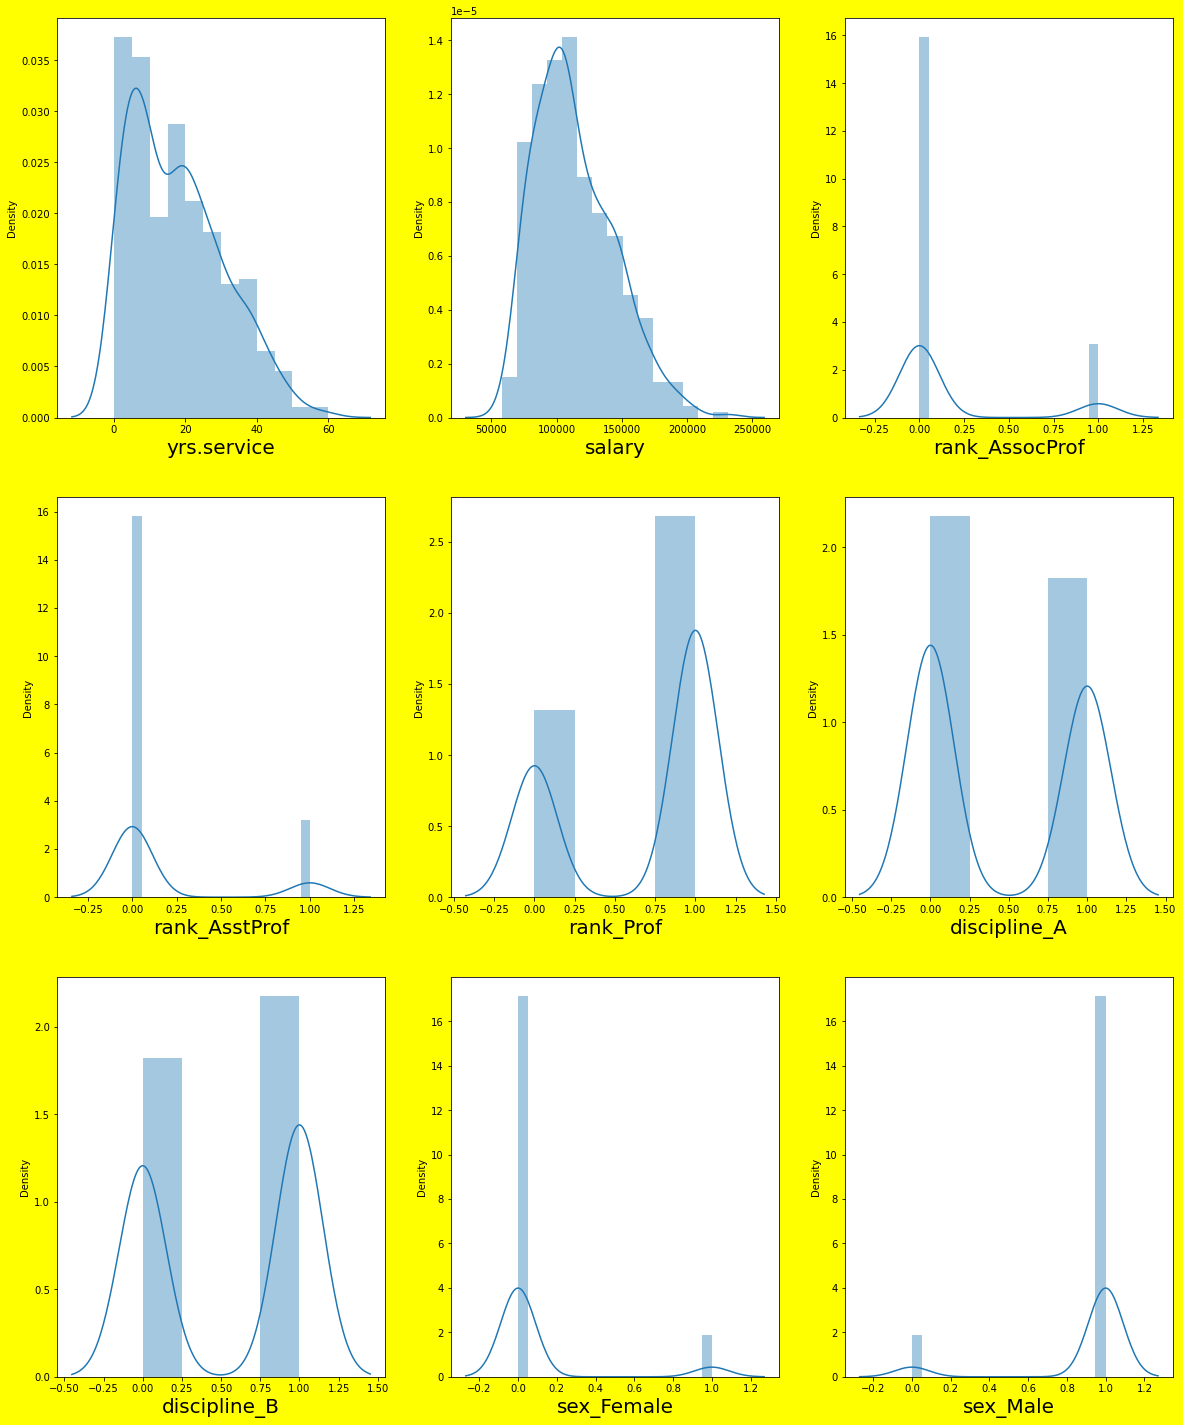

In [24]:
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber = 1
for column in df:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
        
        
        plotnumber+=1
plt.show()

In [25]:
df.skew()

yrs.service       0.650569
salary            0.714568
rank_AssocProf    1.849635
rank_AsstProf     1.775445
rank_Prof        -0.725944
discipline_A      0.177684
discipline_B     -0.177684
sex_Female        2.709958
sex_Male         -2.709958
dtype: float64

In [26]:
df['yrs.service'] = np.sqrt(df['yrs.service'])

In [27]:
df['rank_AssocProf'] = np.sqrt(df['rank_AssocProf'])

In [28]:
df['rank_AsstProf'] = np.sqrt(df['rank_AsstProf'])

In [29]:
df

,yrs.service,salary,rank_AssocProf,rank_AsstProf,rank_Prof,discipline_A,discipline_B,sex_Female,sex_Male
0,4.242641,139750,0.0,0.0,1,0,1,0,1
1,4.000000,173200,0.0,0.0,1,0,1,0,1
2,1.732051,79750,0.0,1.0,0,0,1,0,1
3,6.244998,115000,0.0,0.0,1,0,1,0,1
4,6.403124,141500,0.0,0.0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...
392,5.477226,103106,0.0,0.0,1,1,0,0,1
393,4.358899,150564,0.0,0.0,1,1,0,0,1
394,5.000000,101738,0.0,0.0,1,1,0,0,1
395,3.872983,95329,0.0,0.0,1,1,0,0,1


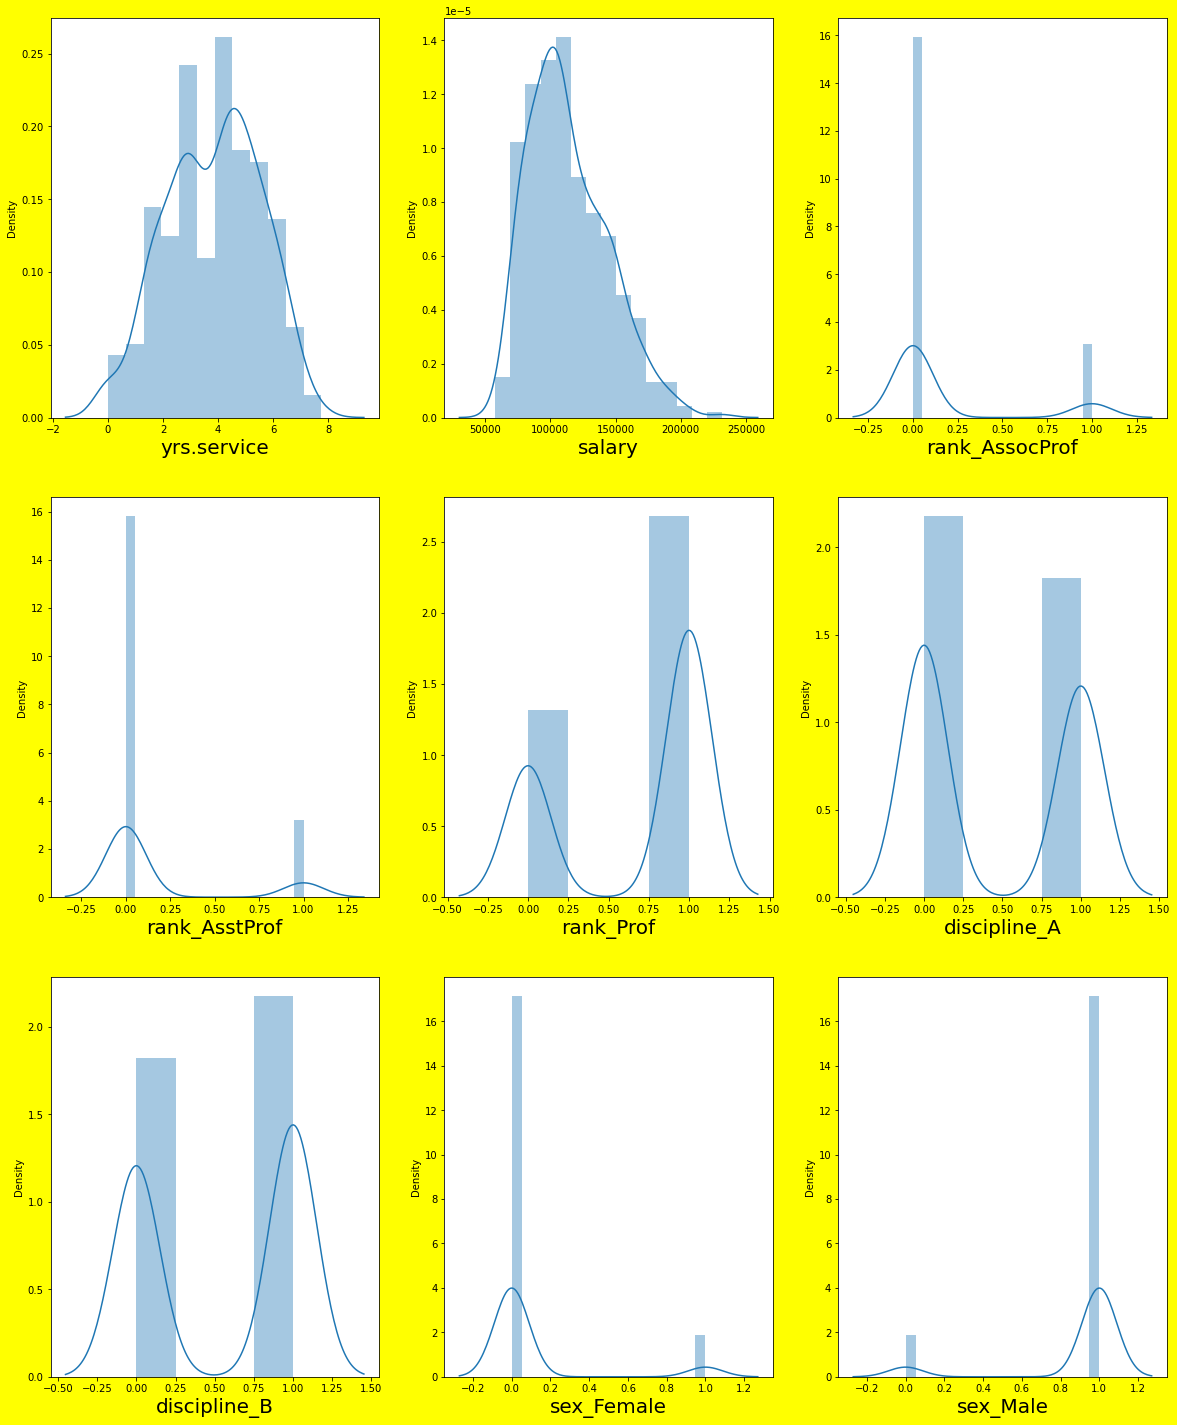

In [30]:
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber = 1
for column in df:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
        
        
        plotnumber+=1
plt.show()

In [31]:
df['yrs.service'].skew()

-0.16035285418029294

In [32]:
df.skew()

yrs.service      -0.160353
salary            0.714568
rank_AssocProf    1.850586
rank_AsstProf     1.776367
rank_Prof        -0.725944
discipline_A      0.177684
discipline_B     -0.177684
sex_Female        2.709958
sex_Male         -2.709958
dtype: float64

In [33]:
sk = df.skew()

In [34]:
sk[np.abs(sk)<0.5].all()

True

remove the skewness follow the normal distribution

# check the outliers 

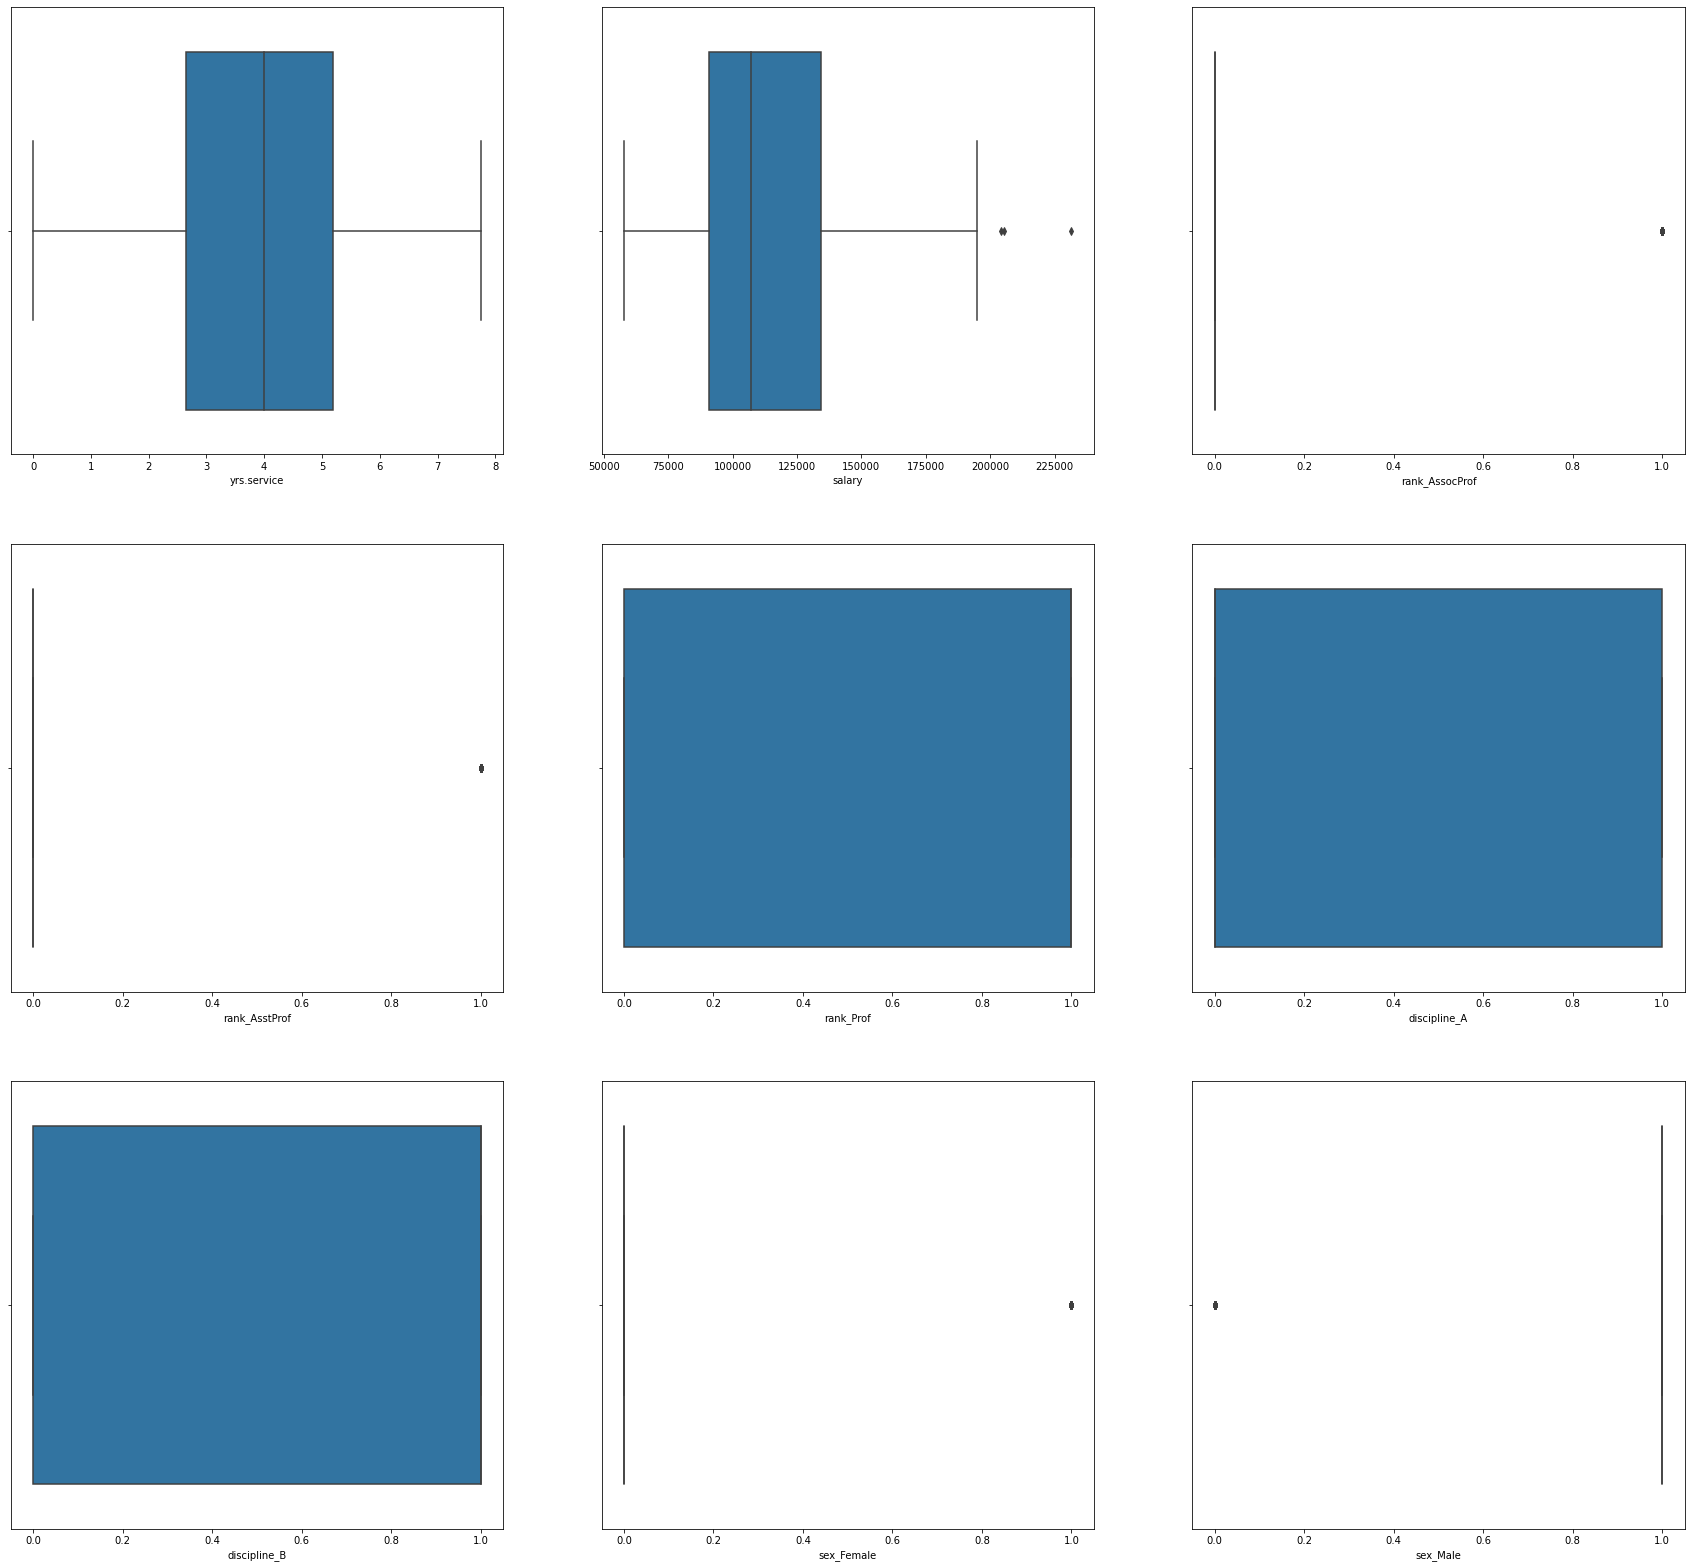

In [35]:
plt.figure(figsize=(30,28))
graph = 1
for column in df:
    if graph<=9:
        ax = plt.subplot(3,3,graph)
        sns.boxplot(df[column],orient='v')
        plt.xlabel(column,fontsize=10)
        
        
        
        graph+=1
plt.show()

In [36]:
df['yrs.service'].describe()

count    397.000000
mean       3.838391
std        1.699600
min        0.000000
25%        2.645751
50%        4.000000
75%        5.196152
max        7.745967
Name: yrs.service, dtype: float64

In [37]:
df['salary'].describe()

count       397.000000
mean     113706.458438
std       30289.038695
min       57800.000000
25%       91000.000000
50%      107300.000000
75%      134185.000000
max      231545.000000
Name: salary, dtype: float64

In [38]:
print('Highest allowed',df['salary'].mean()+3*df['salary'].std())
print('Lowest allowed',df['salary'].mean()-3*df['salary'].std())

Highest allowed 204573.57452253054
Lowest allowed 22839.34235404375


In [39]:
df = df[(df['salary']<204573.57452)&(df['salary']>22839.342354 )] 

In [40]:
df['salary'].describe()

count       395.000000
mean     113175.744304
std       29413.790910
min       57800.000000
25%       91000.000000
50%      107200.000000
75%      133950.000000
max      204000.000000
Name: salary, dtype: float64

<AxesSubplot:xlabel='salary'>

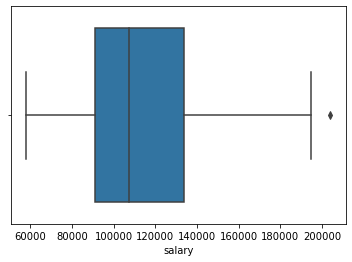

In [41]:
sns.boxplot(x = df['salary'])

In [42]:
print('Highest allowed',df['salary'].mean()+3*df['salary'].std())
print('Lowest allowed',df['salary'].mean()-3*df['salary'].std())

Highest allowed 201417.11703334164
Lowest allowed 24934.37157425331


In [43]:
df = df[(df['salary']<201417.11703)&(df['salary']>24934.37157 )] 

In [44]:
df['salary'].describe()

count       394.000000
mean     112945.225888
std       29091.740021
min       57800.000000
25%       91000.000000
50%      107175.000000
75%      133850.000000
max      194800.000000
Name: salary, dtype: float64

In [45]:
df

,yrs.service,salary,rank_AssocProf,rank_AsstProf,rank_Prof,discipline_A,discipline_B,sex_Female,sex_Male
0,4.242641,139750,0.0,0.0,1,0,1,0,1
1,4.000000,173200,0.0,0.0,1,0,1,0,1
2,1.732051,79750,0.0,1.0,0,0,1,0,1
3,6.244998,115000,0.0,0.0,1,0,1,0,1
4,6.403124,141500,0.0,0.0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...
392,5.477226,103106,0.0,0.0,1,1,0,0,1
393,4.358899,150564,0.0,0.0,1,1,0,0,1
394,5.000000,101738,0.0,0.0,1,1,0,0,1
395,3.872983,95329,0.0,0.0,1,1,0,0,1


<AxesSubplot:xlabel='salary'>

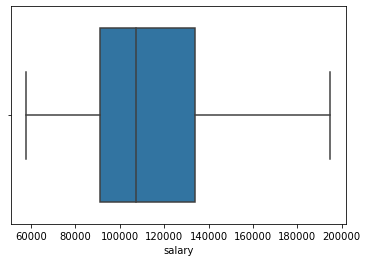

In [46]:
sns.boxplot(x = df['salary'])

remove the outliers

In [47]:
df.drop(['sex_Female','sex_Male'],axis=1,inplace=True)

In [48]:
df.columns

Index(['yrs.service', 'salary', 'rank_AssocProf', 'rank_AsstProf', 'rank_Prof',
       'discipline_A', 'discipline_B'],
      dtype='object')

# features scaling

In [49]:
x = df.drop(['salary'],axis=1)
y = df['salary']

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaler = StandardScaler()

In [52]:
x_scaled = scaler.fit_transform(x)

In [53]:
from sklearn.model_selection import train_test_split


In [55]:

    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=355)
    
        

         
                  
    
    
    

# model selection

In [56]:
from sklearn.model_selection import KFold

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
lr = LinearRegression()

In [59]:
lr.fit(x_train,y_train)

LinearRegression()

In [60]:
lr.score(x_train,y_train)

0.4375640641120593

In [61]:
lr.score(x_test,y_test)

0.4807791543104315

In [62]:
y_pred = lr.predict(x_test)

In [63]:
y_pred

array([ 73786.52849658,  76858.52849658,  94292.7836942 , 116794.52849658,
        93780.7836942 ,  75834.52849658,  91220.7836942 , 138324.7836942 ,
        73786.52849658,  93780.7836942 , 116794.52849658, 134740.7836942 ,
       119354.52849658, 135764.7836942 , 117818.52849658, 135252.7836942 ,
        73274.52849658,  91220.7836942 ,  92244.7836942 ,  75322.52849658,
        74810.52849658,  92756.7836942 , 135764.7836942 ,  91732.7836942 ,
        95316.7836942 , 117818.52849658,  93780.7836942 ,  92756.7836942 ,
        94292.7836942 , 135764.7836942 ,  92756.7836942 , 116794.52849658,
       117306.52849658, 134740.7836942 , 117306.52849658, 135252.7836942 ,
       116794.52849658, 137812.7836942 , 118330.52849658, 117306.52849658,
       136788.7836942 , 117306.52849658, 135764.7836942 , 135764.7836942 ,
       137812.7836942 ,  92244.7836942 , 134740.7836942 , 136276.7836942 ,
        91732.7836942 , 134228.7836942 , 134228.7836942 , 117818.52849658,
       119354.52849658, 1

In [64]:
from sklearn.metrics import r2_score

In [65]:
r2_score(y_test,y_pred)

0.4807791543104315

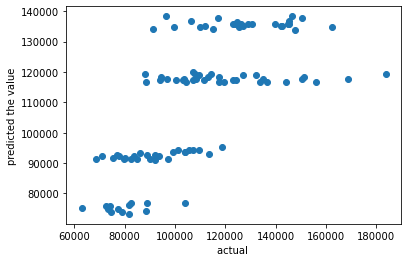

In [66]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual ')
plt.ylabel('predicted the value')
plt.show()

# model_evalution

In [67]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
y_pred = lr.predict(x_test)
mean_absolute_error(y_test,y_pred)
mean_squared_error(y_test,y_pred)
np.sqrt(mean_squared_error(y_test,y_pred))

18253.352998723156

In [68]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
lassocv = LassoCV(alphas = None,max_iter=43,normalize=True)
lassocv.fit(x_train,y_train)
alpha = lassocv.alpha_
lasso_reg = Lasso(alpha)


In [69]:
lasso_reg.fit(x_train,y_train)
lasso_reg.score(x_test,y_test)

0.5277658151706821

# ridgecv

In [70]:
ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)
ridgecv.alpha_
ridge_model = Ridge(alpha=ridgecv.alpha_)

In [71]:
ridge_model.fit(x_train,y_train)
ridge_model.score(x_test,y_test)

0.5270811172900575

# random forest regressor

In [72]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
rf.score(x_test,y_test)
rf.score(x_train,y_train)


0.6356482941120762

In [73]:
rf.score(x_train,y_train)

0.6356482941120762

In [74]:
rf.score(x_test,y_test)

0.34116245281800006

In [75]:
y_pred = rf.predict(x_test)

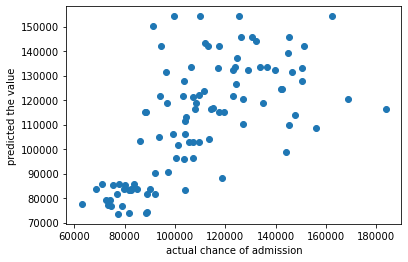

In [76]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual chance of admission')
plt.ylabel('predicted the value')
plt.show()

In [77]:
y_pred = rf.predict(x_test)
mean_absolute_error(y_test,y_pred)
mean_squared_error(y_test,y_pred)
np.sqrt(mean_squared_error(y_test,y_pred))

20561.54589052924

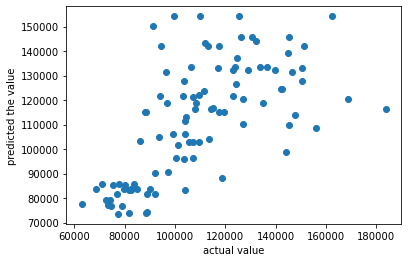

In [78]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual value')
plt.ylabel('predicted the value')
plt.show()

In [79]:
r2_score(y_test,y_pred)

0.34116245281800006

In [80]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
lassocv = LassoCV(alphas = None,max_iter=43,normalize=True)
lassocv.fit(x_train,y_train)
alpha = lassocv.alpha_
lasso_reg = Lasso(alpha)


In [81]:
lasso_reg.fit(x_train,y_train)
lasso_reg.score(x_test,y_test)

0.5277658151706821

In [82]:
ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)
ridgecv.alpha_
ridge_model = Ridge(alpha=ridgecv.alpha_)

In [83]:
ridge_model.fit(x_train,y_train)
ridge_model.score(x_test,y_test)

0.5270811172900575

In [84]:
y_pred = ridge_model.predict(x_test)

In [85]:
ridge_model.predict(scaler.transform([[3.87,0.0,0.0,1,1,0]]))

array([118984.04202323])

# xgb

In [86]:
from sklearn.ensemble import GradientBoostingRegressor

In [87]:
gb = GradientBoostingRegressor()

In [88]:
gb.fit(x_train,y_train)

GradientBoostingRegressor()

In [89]:
gb.fit(x_test,y_test)

GradientBoostingRegressor()

In [90]:
gb.score(x_test,y_test)

0.7815475724808015

In [91]:
y_pred = gb.predict(x_test)

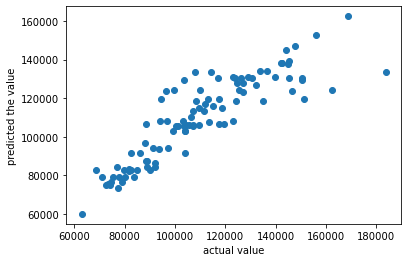

In [92]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual value')
plt.ylabel('predicted the value')
plt.show()

In [93]:
r2_score(y_test,y_pred)

0.7815475724808015

In [94]:
df.tail(2)

,yrs.service,salary,rank_AssocProf,rank_AsstProf,rank_Prof,discipline_A,discipline_B
395,3.872983,95329,0.0,0.0,1,1,0
396,2.000000,81035,0.0,1.0,0,1,0


In [95]:
gb.predict(scaler.transform([[3.87,0.0,0.0,1,1,0]]))

array([114919.27699225])

In [96]:
rf.predict(scaler.transform([[3.87,0.0,0.0,1,1,0]]))

array([121980.92738095])

In [97]:
lr.predict(scaler.transform([[3.87,0.0,0.0,1,1,0]]))

array([118679.68135593])

# desicion tree regressor

In [98]:
from sklearn.tree import DecisionTreeRegressor

In [99]:
clf = DecisionTreeRegressor()
clf.fit(x_train,y_train)

DecisionTreeRegressor()

In [100]:
clf.score(x_test,y_test)

0.25365877714080787

In [101]:
clf.score(x_train,y_train)

0.6539399331383281

In [102]:
y_pred = clf.predict(x_test)

In [103]:
r2_score(y_test,y_pred)

0.25365877714080787

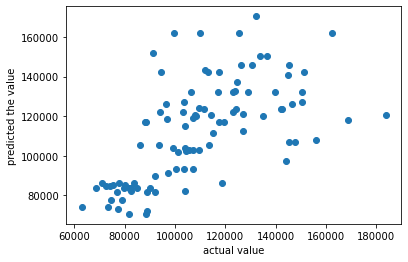

In [104]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual value')
plt.ylabel('predicted the value')
plt.show()

In [105]:
clf.predict(scaler.transform([[3.87,0.0,0.0,1,1,0]]))

array([123925.])

# kneighbors regressor

In [106]:
from sklearn.neighbors import KNeighborsRegressor

In [107]:
kn = KNeighborsRegressor()

In [108]:
kn.fit(x_train,y_train)

KNeighborsRegressor()

In [109]:
kn.score(x_test,y_test)

0.3814045861297012

In [110]:
kn.score(x_train,y_train)

0.5336860734239748

In [111]:
y_pred = kn.predict(x_test)

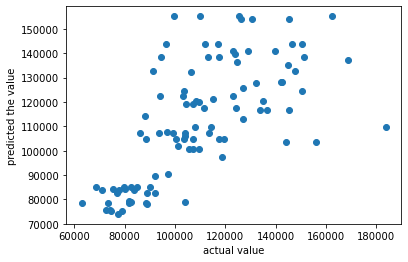

In [112]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual value')
plt.ylabel('predicted the value')
plt.show()

In [113]:
kn.predict(scaler.transform([[3.87,0.0,0.0,1,1,0]]))

array([119408.4])

In [114]:
df.tail(2)

,yrs.service,salary,rank_AssocProf,rank_AsstProf,rank_Prof,discipline_A,discipline_B
395,3.872983,95329,0.0,0.0,1,1,0
396,2.000000,81035,0.0,1.0,0,1,0


In [115]:
from sklearn.model_selection import KFold ,cross_val_score

k_f = KFold(n_splits=3,shuffle=True)

k_f

KFold(n_splits=3, random_state=None, shuffle=True)

In [116]:
for train,test in k_f.split([1,2,3,4,5,6,7,8,9,10]):
   print("train = ",train,"test = ",test)

train =  [0 1 2 5 7 9] test =  [3 4 6 8]
train =  [1 2 3 4 5 6 8] test =  [0 7 9]
train =  [0 3 4 6 7 8 9] test =  [1 2 5]


In [117]:
cross_val_score(kn,x_scaled,y,cv=10)

array([ 0.4237994 , -0.05629662,  0.60346771,  0.57936426,  0.39897843,
        0.42650557,  0.31799394,  0.11494114,  0.24656361,  0.32153784])

In [118]:
cross_val_score(KNeighborsRegressor(),x_scaled,y,cv=5).mean()

0.32960825651524284

conclusion gradient boosting regressor good model accuracy